In [50]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

best_model = load_model('laundry_sorting_model.h5')
fine_tuned_model = load_model('laundry_sorting_model_final.h5')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

data_size = 10000
colors = np.random.randint(0, 256, size=(data_size, 3))
data = pd.DataFrame(colors, columns=['red', 'green', 'blue'])
X = data[['red', 'green', 'blue']]
X_scaled = scaler.transform(X)

# predictions from both models
best_model_predictions = best_model.predict(X_scaled)
fine_tuned_model_predictions = fine_tuned_model.predict(X_scaled)
best_model_labels = label_encoder.inverse_transform(np.argmax(best_model_predictions, axis=1))
fine_tuned_model_labels = label_encoder.inverse_transform(np.argmax(fine_tuned_model_predictions, axis=1))

label_to_color = {label: i for i, label in enumerate(label_encoder.classes_)}
best_model_colors = [label_to_color[label] for label in best_model_labels]
fine_tuned_model_colors = [label_to_color[label] for label in fine_tuned_model_labels]

313/313 [==============================] - 1s 2ms/step


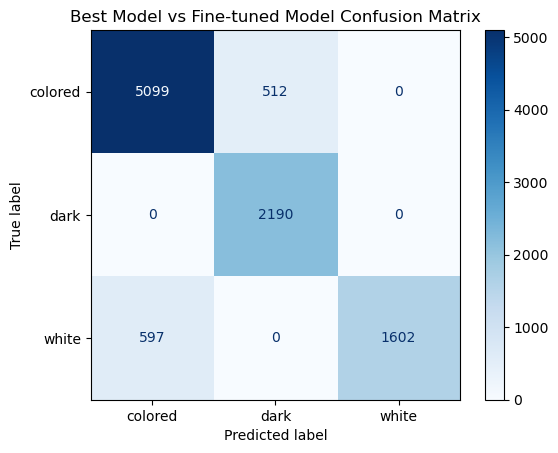

In [51]:
# confusion matrices for comparison
best_model_cm = confusion_matrix(best_model_labels, fine_tuned_model_labels, labels=label_encoder.classes_)
ConfusionMatrixDisplay(confusion_matrix=best_model_cm, display_labels=label_encoder.classes_).plot(cmap='Blues')
plt.title('Best Model vs Fine-tuned Model Confusion Matrix')
plt.show()

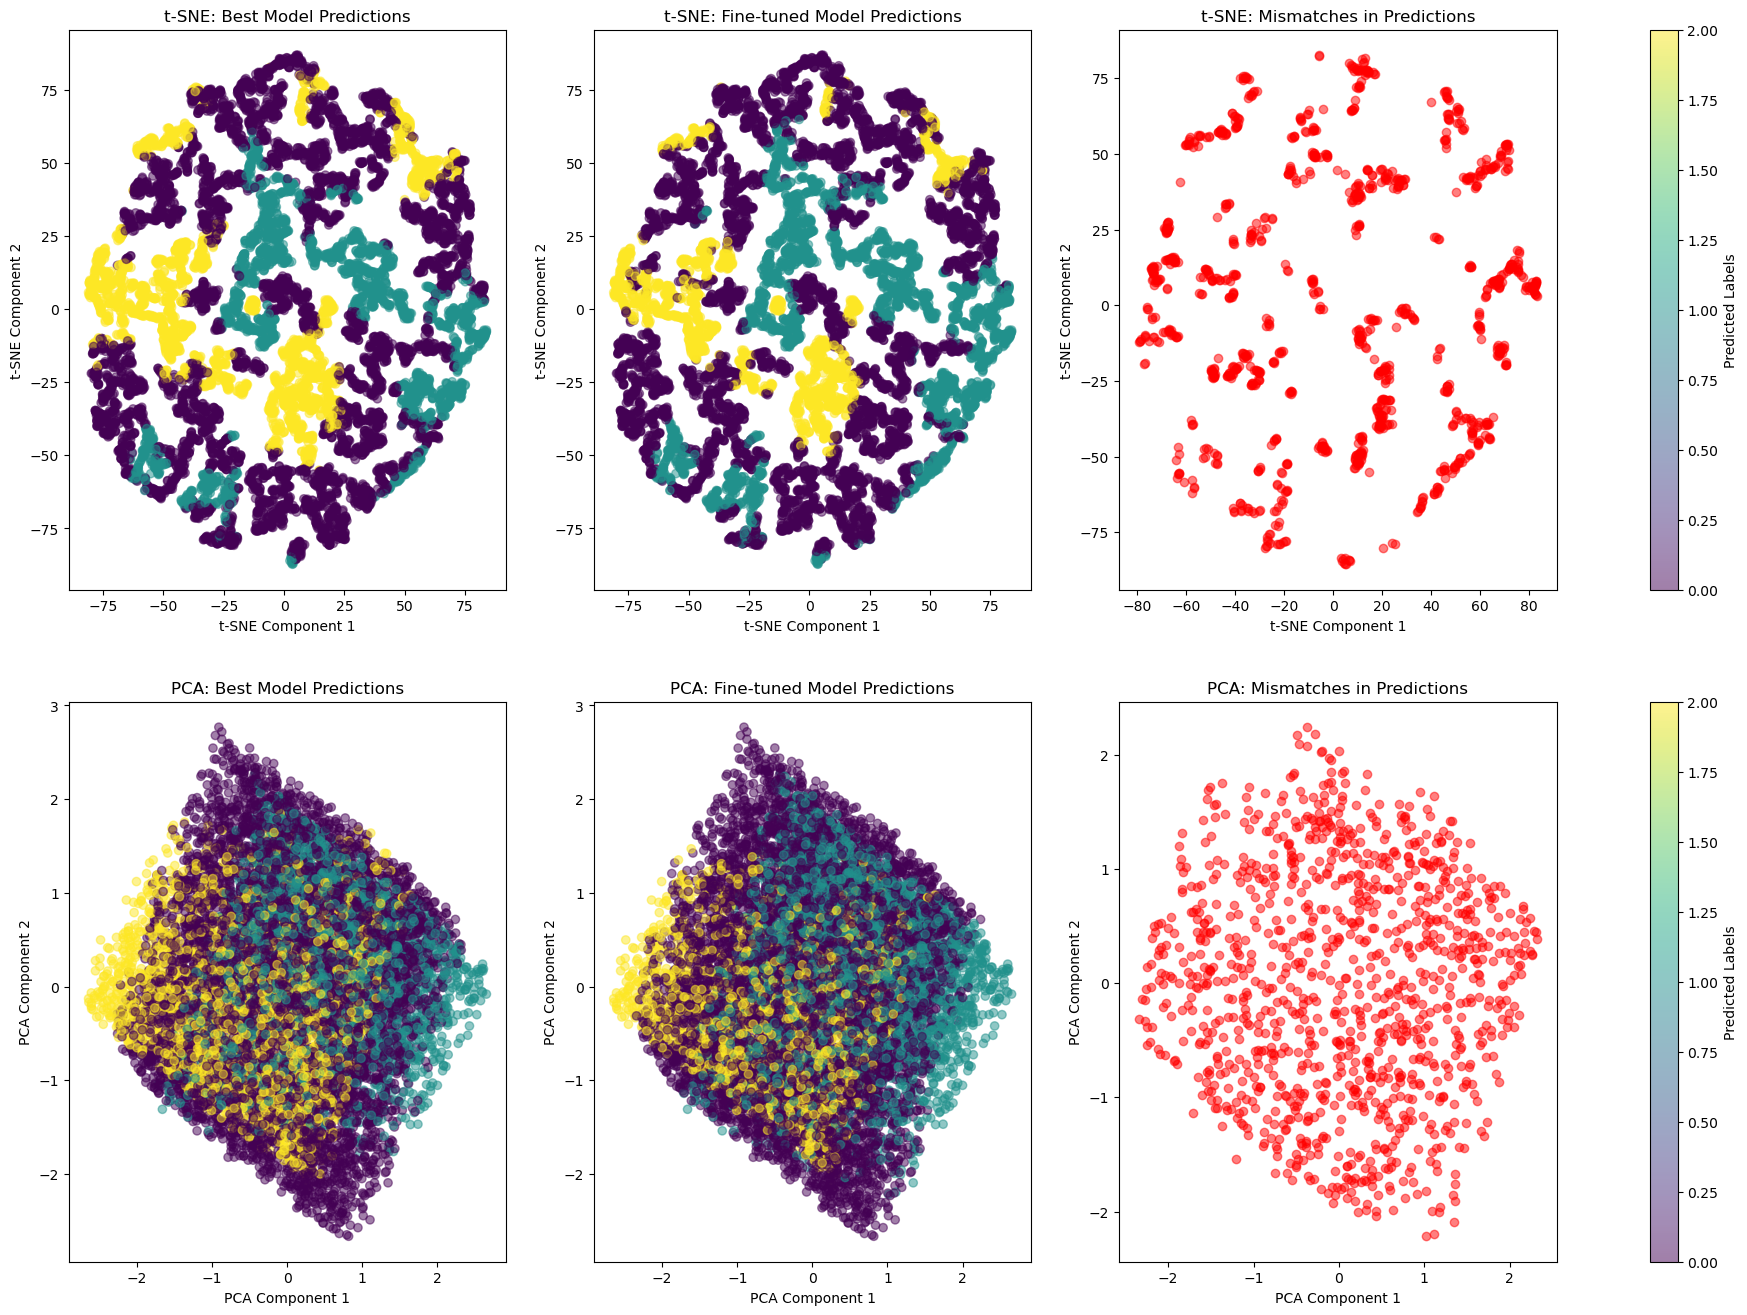

In [52]:
mismatch_mask = best_model_labels != fine_tuned_model_labels

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 3, figsize=(24, 16))

scatter1 = axes[0, 0].scatter(tsne_result[:, 0], tsne_result[:, 1], c=best_model_colors, cmap='viridis', alpha=0.5)
axes[0, 0].set_title('t-SNE: Best Model Predictions')
axes[0, 0].set_xlabel('t-SNE Component 1')
axes[0, 0].set_ylabel('t-SNE Component 2')

scatter2 = axes[0, 1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=fine_tuned_model_colors, cmap='viridis', alpha=0.5)
axes[0, 1].set_title('t-SNE: Fine-tuned Model Predictions')
axes[0, 1].set_xlabel('t-SNE Component 1')
axes[0, 1].set_ylabel('t-SNE Component 2')

scatter3 = axes[0, 2].scatter(tsne_result[mismatch_mask, 0], tsne_result[mismatch_mask, 1], c='red', alpha=0.5, label='Mismatches')
axes[0, 2].set_title('t-SNE: Mismatches in Predictions')
axes[0, 2].set_xlabel('t-SNE Component 1')
axes[0, 2].set_ylabel('t-SNE Component 2')

scatter4 = axes[1, 0].scatter(pca_result[:, 0], pca_result[:, 1], c=best_model_colors, cmap='viridis', alpha=0.5)
axes[1, 0].set_title('PCA: Best Model Predictions')
axes[1, 0].set_xlabel('PCA Component 1')
axes[1, 0].set_ylabel('PCA Component 2')

scatter5 = axes[1, 1].scatter(pca_result[:, 0], pca_result[:, 1], c=fine_tuned_model_colors, cmap='viridis', alpha=0.5)
axes[1, 1].set_title('PCA: Fine-tuned Model Predictions')
axes[1, 1].set_xlabel('PCA Component 1')
axes[1, 1].set_ylabel('PCA Component 2')

scatter6 = axes[1, 2].scatter(pca_result[mismatch_mask, 0], pca_result[mismatch_mask, 1], c='red', alpha=0.5, label='Mismatches')
axes[1, 2].set_title('PCA: Mismatches in Predictions')
axes[1, 2].set_xlabel('PCA Component 1')
axes[1, 2].set_ylabel('PCA Component 2')

fig.colorbar(scatter1, ax=axes[0, :], label='Predicted Labels')
fig.colorbar(scatter4, ax=axes[1, :], label='Predicted Labels')

plt.show()

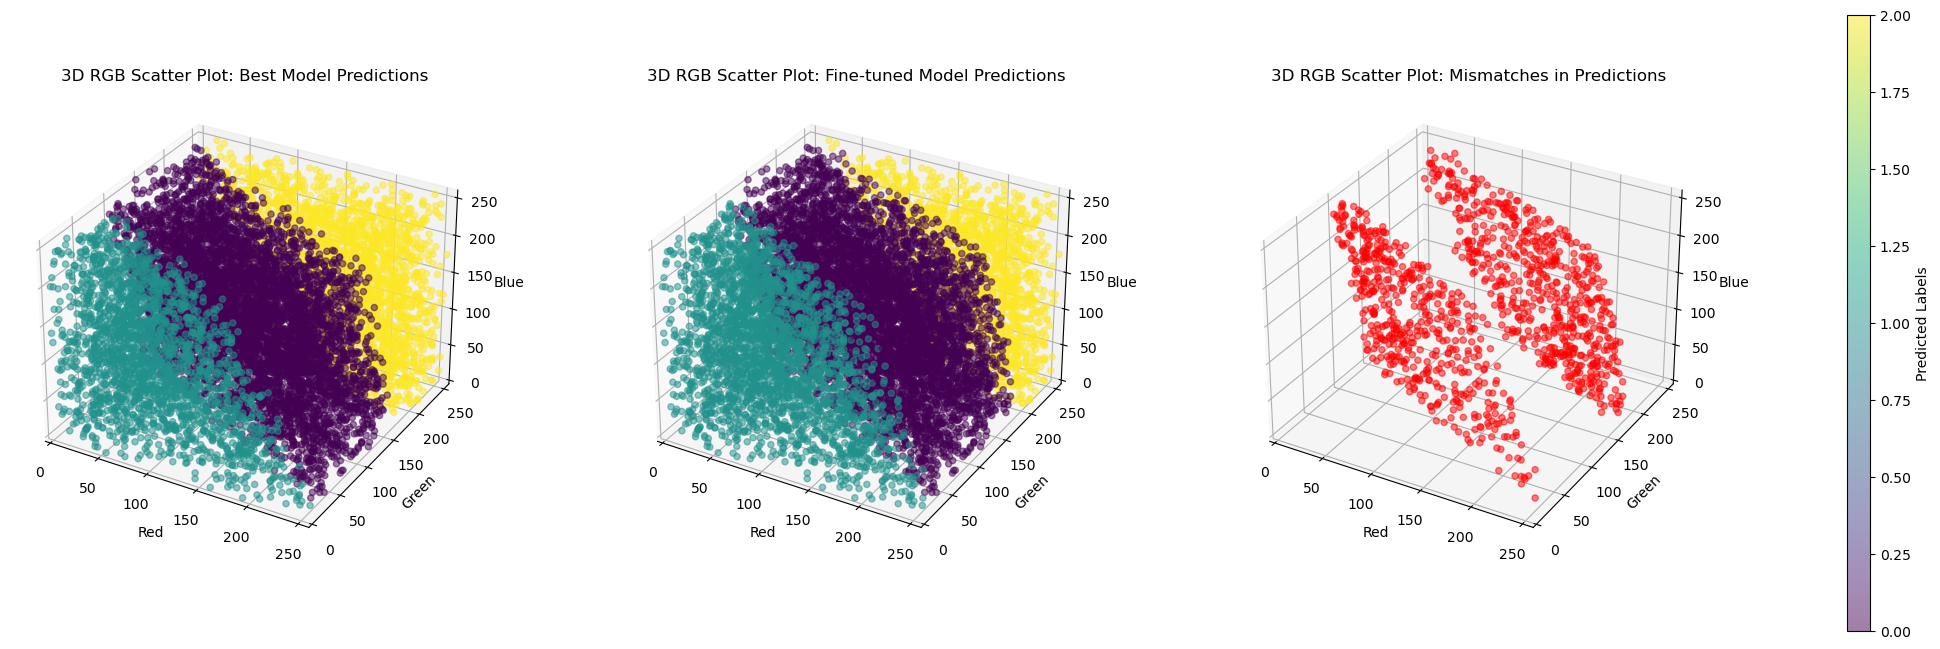

In [57]:
import matplotlib.pyplot as plt
from matplotlib import gridspec


fig = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.4)

ax1 = fig.add_subplot(gs[0], projection='3d')
scatter1 = ax1.scatter(data['red'], data['green'], data['blue'], c=best_model_colors, cmap='viridis', alpha=0.5)
ax1.set_title('3D RGB Scatter Plot: Best Model Predictions')
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
ax1.set_zlabel('Blue')
ax1.set_xlim([0, 255])
ax1.set_ylim([0, 255])
ax1.set_zlim([0, 255])

ax2 = fig.add_subplot(gs[1], projection='3d')
scatter2 = ax2.scatter(data['red'], data['green'], data['blue'], c=fine_tuned_model_colors, cmap='viridis', alpha=0.5)
ax2.set_title('3D RGB Scatter Plot: Fine-tuned Model Predictions')
ax2.set_xlabel('Red')
ax2.set_ylabel('Green')
ax2.set_zlabel('Blue')
ax2.set_xlim([0, 255])
ax2.set_ylim([0, 255])
ax2.set_zlim([0, 255])

# Filter data for mismatches only
mismatch_red = data['red'][mismatch_mask]
mismatch_green = data['green'][mismatch_mask]
mismatch_blue = data['blue'][mismatch_mask]

ax3 = fig.add_subplot(gs[2], projection='3d')
scatter3 = ax3.scatter(mismatch_red, mismatch_green, mismatch_blue, c='red', alpha=0.5)
ax3.set_title('3D RGB Scatter Plot: Mismatches in Predictions')
ax3.set_xlabel('Red')
ax3.set_ylabel('Green')
ax3.set_zlabel('Blue')
ax3.set_xlim([0, 255])
ax3.set_ylim([0, 255])
ax3.set_zlim([0, 255])

cbar_ax = fig.add_subplot(gs[3])
fig.colorbar(scatter1, cax=cbar_ax, label='Predicted Labels')

plt.show()


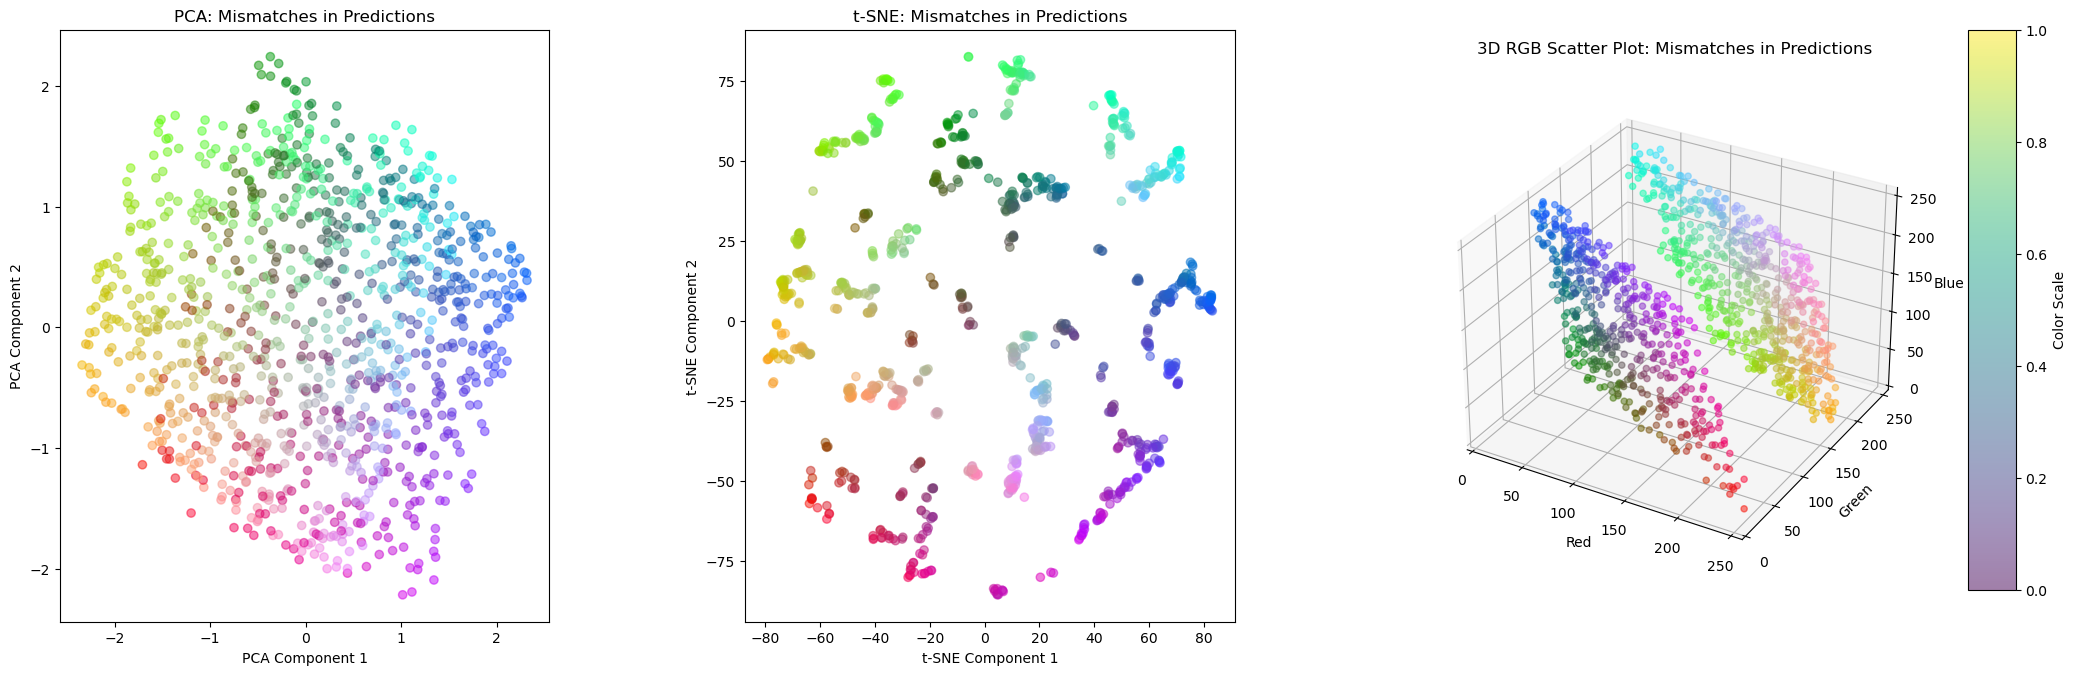

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(24, 8))

# PCA Mismatches
ax1 = fig.add_subplot(131)
scatter1 = ax1.scatter(pca_result[mismatch_mask, 0], pca_result[mismatch_mask, 1], c=data[mismatch_mask].apply(
    lambda row: (row['red'] / 255, row['green'] / 255, row['blue'] / 255), axis=1), alpha=0.5)
ax1.set_title('PCA: Mismatches in Predictions')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')

# t-SNE Mismatches
ax2 = fig.add_subplot(132)
scatter2 = ax2.scatter(tsne_result[mismatch_mask, 0], tsne_result[mismatch_mask, 1], c=data[mismatch_mask].apply(
    lambda row: (row['red'] / 255, row['green'] / 255, row['blue'] / 255), axis=1), alpha=0.5)
ax2.set_title('t-SNE: Mismatches in Predictions')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')

ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(mismatch_red, mismatch_green, mismatch_blue,
                       c=[(r / 255, g / 255, b / 255) for r, g, b in zip(mismatch_red, mismatch_green, mismatch_blue)],
                       alpha=0.5)
ax3.set_title('3D RGB Scatter Plot: Mismatches in Predictions', pad=20)
ax3.set_xlabel('Red')
ax3.set_ylabel('Green')
ax3.set_zlabel('Blue')
ax3.set_xlim([0, 255])
ax3.set_ylim([0, 255])
ax3.set_zlim([0, 255])

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(scatter2, cax=cbar_ax)
cbar.set_label('Color Scale')

fig.subplots_adjust(wspace=0.4, top=0.85)

plt.show()
